# LDG - Loss Given Default

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data_backup = pd.read_csv('credit_risk_dataset_preprocessed.csv', index_col=0)

In [3]:
credit_data = data_backup.copy()

In [4]:
pd.options.display.max_columns = None

In [5]:
pd.options.display.max_rows = 100

In [6]:
credit_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership:MORTGAGE,person_home_ownership:OTHER,person_home_ownership:OWN,person_home_ownership:RENT,loan_grade:A,loan_grade:B,loan_grade:C,loan_grade:D,loan_grade:E,loan_grade:F,loan_grade:G,cb_person_default_on_file:N,cb_person_default_on_file:Y,loan_intent:DEBTCONSOLIDATION,loan_intent:EDUCATION,loan_intent:HOMEIMPROVEMENT,loan_intent:MEDICAL,loan_intent:PERSONAL,loan_intent:VENTURE,good_bad
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0


For simplicity and lack of detailed information reasons, I will use the loan_status = 1 to represent the defaulted accounts.

In [7]:
credit_data_default = credit_data[credit_data['loan_status'] == 1]

In [8]:
credit_data_default.shape

(7108, 32)

In [9]:
credit_data_default.isnull().sum()

person_age                        0
person_income                     0
person_home_ownership             0
person_emp_length                 0
loan_intent                       0
loan_grade                        0
loan_amnt                         0
loan_int_rate                     0
loan_status                       0
loan_percent_income               0
cb_person_default_on_file         0
cb_person_cred_hist_length        0
person_home_ownership:MORTGAGE    0
person_home_ownership:OTHER       0
person_home_ownership:OWN         0
person_home_ownership:RENT        0
loan_grade:A                      0
loan_grade:B                      0
loan_grade:C                      0
loan_grade:D                      0
loan_grade:E                      0
loan_grade:F                      0
loan_grade:G                      0
cb_person_default_on_file:N       0
cb_person_default_on_file:Y       0
loan_intent:DEBTCONSOLIDATION     0
loan_intent:EDUCATION             0
loan_intent:HOMEIMPROVEMENT 

In [10]:
credit_data_default.head(20)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership:MORTGAGE,person_home_ownership:OTHER,person_home_ownership:OWN,person_home_ownership:RENT,loan_grade:A,loan_grade:B,loan_grade:C,loan_grade:D,loan_grade:E,loan_grade:F,loan_grade:G,cb_person_default_on_file:N,cb_person_default_on_file:Y,loan_intent:DEBTCONSOLIDATION,loan_intent:EDUCATION,loan_intent:HOMEIMPROVEMENT,loan_intent:MEDICAL,loan_intent:PERSONAL,loan_intent:VENTURE,good_bad
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
10,22,85000,RENT,6.0,VENTURE,B,35000,10.37,1,0.41,N,4,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0


### Now, let's create a column of recovery amount for each row. I will first random select 50% of the data to set the recovery amount as 0. Then, for the rest of the data, I will assign a random number between 0 and the total loan amount. The random numbers abide beta distribution (alpha = 2, beta = 5), to the proportion of the loan amount.

In [11]:
credit_data_default_LGD_1 = credit_data_default.sample(frac=0.5, random_state=42)

In [12]:
credit_data_default_LGD_0 = credit_data_default[~credit_data_default.isin(credit_data_default_LGD_1)].dropna()

In [13]:
credit_data_default.shape

(7108, 32)

In [14]:
credit_data_default_LGD_0.shape

(3554, 32)

In [15]:
credit_data_default_LGD_1.shape

(3554, 32)

In [16]:
credit_data_default_LGD_0['recovery'] = 0.0

In [17]:
credit_data_default_LGD_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3554 entries, 0 to 32556
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      3554 non-null   float64
 1   person_income                   3554 non-null   float64
 2   person_home_ownership           3554 non-null   object 
 3   person_emp_length               3554 non-null   float64
 4   loan_intent                     3554 non-null   object 
 5   loan_grade                      3554 non-null   object 
 6   loan_amnt                       3554 non-null   float64
 7   loan_int_rate                   3554 non-null   float64
 8   loan_status                     3554 non-null   float64
 9   loan_percent_income             3554 non-null   float64
 10  cb_person_default_on_file       3554 non-null   object 
 11  cb_person_cred_hist_length      3554 non-null   float64
 12  person_home_ownership:MORTGAGE  3

In [18]:
credit_data_default_LGD_1['recovery'] = round(credit_data_default_LGD_1['loan_amnt'] * np.random.beta(2,5,credit_data_default_LGD_1.shape[0]))

In [19]:
credit_data_default_LGD_1.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership:MORTGAGE,person_home_ownership:OTHER,person_home_ownership:OWN,person_home_ownership:RENT,loan_grade:A,loan_grade:B,loan_grade:C,loan_grade:D,loan_grade:E,loan_grade:F,loan_grade:G,cb_person_default_on_file:N,cb_person_default_on_file:Y,loan_intent:DEBTCONSOLIDATION,loan_intent:EDUCATION,loan_intent:HOMEIMPROVEMENT,loan_intent:MEDICAL,loan_intent:PERSONAL,loan_intent:VENTURE,good_bad,recovery
21472,33,19200,RENT,0.0,PERSONAL,B,6000,10.65,1,0.31,N,6,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,3066.0
18804,27,27000,OWN,0.0,EDUCATION,G,11500,20.11,1,0.43,N,9,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,3386.0
19105,27,15600,RENT,1.0,HOMEIMPROVEMENT,D,2250,18.25,1,0.14,N,6,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,460.0
20561,28,88000,RENT,3.0,PERSONAL,B,10000,10.65,1,0.11,N,9,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,2582.0
16782,25,49000,RENT,1.0,PERSONAL,D,12000,13.49,1,0.24,N,4,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1872.0
19863,28,41500,RENT,3.0,MEDICAL,D,11000,15.33,1,0.27,Y,5,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,215.0
23005,30,35600,RENT,0.0,EDUCATION,D,8000,14.59,1,0.22,N,9,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1462.0
548,26,42000,RENT,0.0,MEDICAL,F,21000,17.26,1,0.50,Y,4,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,13627.0
30835,36,60000,MORTGAGE,3.0,DEBTCONSOLIDATION,D,13000,14.11,1,0.22,Y,14,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1715.0
15479,24,128000,MORTGAGE,7.0,DEBTCONSOLIDATION,D,18000,17.27,1,0.14,Y,2,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,3741.0


In [20]:
credit_data_default_LGD = pd.concat([credit_data_default_LGD_1, credit_data_default_LGD_0])

In [21]:
credit_data_default_LGD['recovery'].describe()

count     7108.000000
mean      1559.909116
std       2586.947720
min          0.000000
25%          0.000000
50%         10.500000
75%       2249.750000
max      26386.000000
Name: recovery, dtype: float64

### Dependent Variables: LGD

In [23]:
credit_data_default_LGD['recovery_rate'] = credit_data_default_LGD['recovery'] / credit_data_default_LGD['loan_amnt']

In [24]:
credit_data_default_LGD['recovery_rate'].describe()

count    7108.000000
mean        0.144543
std         0.184410
min         0.000000
25%         0.000000
50%         0.003980
75%         0.263778
max         0.895158
Name: recovery_rate, dtype: float64

(array([3.566e+03, 4.400e+01, 6.200e+01, 8.800e+01, 1.180e+02, 1.130e+02,
        1.520e+02, 1.490e+02, 1.420e+02, 1.400e+02, 1.520e+02, 1.510e+02,
        1.570e+02, 1.720e+02, 1.560e+02, 1.290e+02, 1.270e+02, 1.250e+02,
        1.510e+02, 1.090e+02, 1.110e+02, 1.060e+02, 8.800e+01, 1.050e+02,
        7.500e+01, 8.800e+01, 6.000e+01, 7.900e+01, 5.300e+01, 5.200e+01,
        4.200e+01, 4.300e+01, 3.400e+01, 2.900e+01, 2.000e+01, 1.400e+01,
        2.400e+01, 1.500e+01, 1.300e+01, 1.300e+01, 1.000e+01, 7.000e+00,
        8.000e+00, 4.000e+00, 4.000e+00, 3.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 2.000e+00]),
 array([0.        , 0.01790316, 0.03580632, 0.05370947, 0.07161263,
        0.08951579, 0.10741895, 0.12532211, 0.14322526, 0.16112842,
        0.17903158, 0.19693474, 0.21483789, 0.23274105, 0.25064421,
        0.26854737, 0.28645053, 0.30435368, 0.32225684, 0.34016   ,
        0.35806316, 0.37596632, 0.39386947, 0.41177263, 0.42967579,
        0.44757895, 0.46548211, 0.48

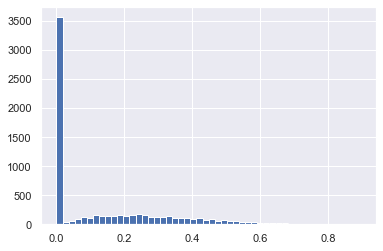

In [25]:
plt.hist(credit_data_default_LGD['recovery_rate'], bins=50)

In [26]:
credit_data_default_LGD['recovery_rate_0_1'] = np.where(credit_data_default_LGD['recovery_rate'] == 0, 0 ,1)

'recovery_rate' is the dependent variable of LGD.

### Dependent Variables: EAD

We will compute the credit conversion factor, which is the amount not paid devided by the total loan amount.

### Similarly to LGD model, we create the total recovery principal for each input. The number will be randonly selected between 0 and to total loan amount. Please note that this is a different case from the LGD model. And those two cases are for demonstrative purpose. At last, we will pretend them to be one case to cal.

The random numbers abide (1-x), where x is a beta distribution (alpha = 2, beta=5), to the proportion of the total loan amount.

In [27]:
credit_data_default_LGD_EAD = credit_data_default_LGD.copy()

In [28]:
credit_data_default_LGD_EAD['total_rec_prcp'] = credit_data_default_LGD_EAD['loan_amnt'] - round(credit_data_default_LGD_EAD['loan_amnt'] * (1 - np.random.beta(2,5,credit_data_default_LGD_EAD.shape[0])))

In [29]:
credit_data_default_LGD_EAD.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership:MORTGAGE,person_home_ownership:OTHER,person_home_ownership:OWN,person_home_ownership:RENT,loan_grade:A,loan_grade:B,loan_grade:C,loan_grade:D,loan_grade:E,loan_grade:F,loan_grade:G,cb_person_default_on_file:N,cb_person_default_on_file:Y,loan_intent:DEBTCONSOLIDATION,loan_intent:EDUCATION,loan_intent:HOMEIMPROVEMENT,loan_intent:MEDICAL,loan_intent:PERSONAL,loan_intent:VENTURE,good_bad,recovery,recovery_rate,recovery_rate_0_1,total_rec_prcp
21472,33.0,19200.0,RENT,0.0,PERSONAL,B,6000.0,10.65,1.0,0.31,N,6.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3066.0,0.511000,1,1571.0
18804,27.0,27000.0,OWN,0.0,EDUCATION,G,11500.0,20.11,1.0,0.43,N,9.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3386.0,0.294435,1,2940.0
19105,27.0,15600.0,RENT,1.0,HOMEIMPROVEMENT,D,2250.0,18.25,1.0,0.14,N,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,460.0,0.204444,1,462.0
20561,28.0,88000.0,RENT,3.0,PERSONAL,B,10000.0,10.65,1.0,0.11,N,9.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2582.0,0.258200,1,4000.0
16782,25.0,49000.0,RENT,1.0,PERSONAL,D,12000.0,13.49,1.0,0.24,N,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1872.0,0.156000,1,2059.0
19863,28.0,41500.0,RENT,3.0,MEDICAL,D,11000.0,15.33,1.0,0.27,Y,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,215.0,0.019545,1,6101.0
23005,30.0,35600.0,RENT,0.0,EDUCATION,D,8000.0,14.59,1.0,0.22,N,9.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1462.0,0.182750,1,2693.0
548,26.0,42000.0,RENT,0.0,MEDICAL,F,21000.0,17.26,1.0,0.50,Y,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,13627.0,0.648905,1,7989.0
30835,36.0,60000.0,MORTGAGE,3.0,DEBTCONSOLIDATION,D,13000.0,14.11,1.0,0.22,Y,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1715.0,0.131923,1,2348.0
15479,24.0,128000.0,MORTGAGE,7.0,DEBTCONSOLIDATION,D,18000.0,17.27,1.0,0.14,Y,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3741.0,0.207833,1,11110.0


In [30]:
credit_data_default_LGD_EAD['CCF'] = (credit_data_default_LGD_EAD['loan_amnt'] - credit_data_default_LGD_EAD['total_rec_prcp']) / credit_data_default_LGD_EAD['loan_amnt']

In [31]:
credit_data_default_LGD_EAD['CCF'].describe()

count    7108.000000
mean        0.715887
std         0.159125
min         0.110167
25%         0.609000
50%         0.739414
75%         0.839691
max         0.997467
Name: CCF, dtype: float64

(array([  1.,   0.,   2.,   7.,   5.,   3.,   8.,  11.,  11.,  18.,  15.,
         20.,  22.,  34.,  38.,  60.,  58.,  79.,  72.,  77., 106., 120.,
        123., 146., 167., 178., 178., 192., 210., 194., 214., 236., 243.,
        288., 290., 310., 310., 310., 313., 318., 307., 321., 268., 275.,
        238., 240., 186., 151., 101.,  34.]),
 array([0.11016667, 0.12791267, 0.14565867, 0.16340467, 0.18115067,
        0.19889667, 0.21664267, 0.23438867, 0.25213467, 0.26988067,
        0.28762667, 0.30537267, 0.32311867, 0.34086467, 0.35861067,
        0.37635667, 0.39410267, 0.41184867, 0.42959467, 0.44734067,
        0.46508667, 0.48283267, 0.50057867, 0.51832467, 0.53607067,
        0.55381667, 0.57156267, 0.58930867, 0.60705467, 0.62480067,
        0.64254667, 0.66029267, 0.67803867, 0.69578467, 0.71353067,
        0.73127667, 0.74902267, 0.76676867, 0.78451467, 0.80226067,
        0.82000667, 0.83775267, 0.85549867, 0.87324467, 0.89099067,
        0.90873667, 0.92648267, 0.94422867, 0.

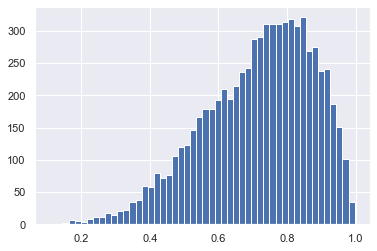

In [32]:
plt.hist(credit_data_default_LGD_EAD['CCF'], bins=50)

# LGD Model

### Stage 1 -- Logistic Regression

In [33]:
from sklearn.model_selection import train_test_split

In [50]:
X_LGD_stage_1_train, X_LGD_stage_1_test, y_LGD_stage_1_train, y_LGD_stage_1_test = train_test_split(credit_data_default_LGD_EAD.drop(['good_bad', 'recovery_rate', 'recovery_rate_0_1', 'CCF'], axis=1), credit_data_default_LGD_EAD['recovery_rate_0_1'], test_size=0.2, random_state=42)

In [42]:
features_all = ['person_home_ownership:OWN', 
'person_home_ownership:MORTGAGE', 
'person_home_ownership:RENT',
'person_home_ownership:OTHER',
'cb_person_default_on_file:Y', 
'cb_person_default_on_file:N',
'loan_grade:A',  
'loan_grade:B',
'loan_grade:C', 
'loan_grade:D', 
'loan_grade:E', 
'loan_grade:F', 
'loan_grade:G',
'loan_intent:DEBTCONSOLIDATION',
'loan_intent:EDUCATION', 
'loan_intent:HOMEIMPROVEMENT',
'loan_intent:MEDICAL',
'loan_intent:PERSONAL',
'loan_intent:VENTURE',
'person_age', 
'person_income', 
'person_emp_length', 
'loan_amnt', 
'loan_int_rate', 
]

In [46]:
reference_cat = ['person_home_ownership:RENT',
'cb_person_default_on_file:Y',
'loan_grade:G',
'loan_intent:DEBTCONSOLIDATION']

In [51]:
X_LGD_stage_1_train = X_LGD_stage_1_train[features_all]

In [52]:
X_LGD_stage_1_train = X_LGD_stage_1_train.drop(reference_cat, axis=1)

In [61]:
X_LGD_stage_1_train.columns

Index(['person_home_ownership:OWN', 'person_home_ownership:MORTGAGE',
       'person_home_ownership:OTHER', 'cb_person_default_on_file:N',
       'loan_grade:A', 'loan_grade:B', 'loan_grade:C', 'loan_grade:D',
       'loan_grade:E', 'loan_grade:F', 'loan_intent:EDUCATION',
       'loan_intent:HOMEIMPROVEMENT', 'loan_intent:MEDICAL',
       'loan_intent:PERSONAL', 'loan_intent:VENTURE', 'person_age',
       'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate'],
      dtype='object')

### Estimating the LGD Model

In [49]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    def __init__(self, *args, **kwargs):
        self.model = linear_model.LogisticRegression(*args, **kwargs)
        
    def fit(self, X, y):
        self.model.fit(X, y)
        demon = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        demon = np.tile(demon, (X.shape[1],1)).T
        F_ij = np.dot((X / demon).T, X) + 0.0001
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [53]:
reg_lgd_st_1 = LogisticRegression_with_p_values(max_iter=1000)

In [55]:
reg_lgd_st_1.fit(X_LGD_stage_1_train, y_LGD_stage_1_train)

In [58]:
feature_name = X_LGD_stage_1_train.columns.values

In [62]:
summary_table = pd.DataFrame(columns=['Feature Name'], data=feature_name)
summary_table['Coefficients'] = np.transpose(reg_lgd_st_1.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg_lgd_st_1.intercept_[0]]
summary_table = summary_table.sort_index()
p_values = reg_lgd_st_1.p_values
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature Name,Coefficients,p_values
0,Intercept,-1.333927e-10,NaN
1,person_home_ownership:OWN,3.903223e-11,1.000000
2,person_home_ownership:MORTGAGE,-7.133628e-12,1.000000
3,person_home_ownership:OTHER,3.731009e-11,1.000000
4,cb_person_default_on_file:N,-1.072998e-10,1.000000
5,loan_grade:A,5.957059e-11,1.000000
6,loan_grade:B,-5.009923e-10,1.000000
7,loan_grade:C,4.924431e-11,1.000000
8,loan_grade:D,2.200668e-10,1.000000
9,loan_grade:E,-8.749486e-11,1.000000


Testing the model

In [63]:
X_LGD_stage_1_test = X_LGD_stage_1_test[features_all]

In [64]:
X_LGD_stage_1_test = X_LGD_stage_1_test.drop(reference_cat, axis=1)

In [65]:
y_hat_lgd_stage_1 = reg_lgd_st_1.model.predict(X_LGD_stage_1_test)

In [68]:
y_hat_proba_lgd_stage_1 = reg_lgd_st_1.model.predict_proba(X_LGD_stage_1_test)

In [69]:
y_hat_proba_lgd_stage_1

array([[0.50306573, 0.49693427],
       [0.50194432, 0.49805568],
       [0.49868213, 0.50131787],
       ...,
       [0.5021008 , 0.4978992 ],
       [0.49703092, 0.50296908],
       [0.50386174, 0.49613826]])

In [70]:
y_hat_proba_lgd_stage_1 = y_hat_proba_lgd_stage_1[:][:,1]

In [71]:
y_hat_proba_lgd_stage_1

array([0.49693427, 0.49805568, 0.50131787, ..., 0.4978992 , 0.50296908,
       0.49613826])

Assess accuracy

In [72]:
y_LGD_stage_1_test_temp = y_LGD_stage_1_test

In [73]:
y_LGD_stage_1_test_temp.reset_index(drop = True, inplace=True)

In [74]:
df_actual_predicted_probs = pd.concat([y_LGD_stage_1_test_temp, pd.DataFrame(y_hat_proba_lgd_stage_1)], axis=1)

In [75]:
df_actual_predicted_probs.columns = ['lgd_targets_stage_1_test', 'y_hat_proba_lgd_stage_1']

In [76]:
df_actual_predicted_probs.index = X_LGD_stage_1_test.index

In [77]:
df_actual_predicted_probs.head()

,lgd_targets_stage_1_test,y_hat_proba_lgd_stage_1
12189,0,0.496934
6762,0,0.498056
7459,0,0.501318
10477,0,0.498136
985,0,0.500134


In [78]:
tr = 0.5
df_actual_predicted_probs['y_hat_lgd_stage_1'] = np.where(df_actual_predicted_probs['y_hat_proba_lgd_stage_1'] > tr, 1, 0)

In [80]:
pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_lgd_stage_1'], rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,387,322
1,377,336


In [81]:
pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_lgd_stage_1'], rownames=['Actual'], colnames=['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.272152,0.226442
1,0.265120,0.236287


In [83]:
(pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_lgd_stage_1'], rownames=['Actual'], colnames=['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0,0] + (pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_lgd_stage_1'], rownames=['Actual'], colnames=['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1,1]

0.5084388185654009

In [84]:
from sklearn.metrics import roc_auc_score, roc_curve

In [85]:
    fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_proba_lgd_stage_1'])

Text(0.5, 1.0, 'ROC Curve')

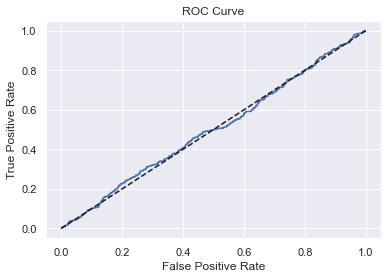

In [86]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color= 'k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

In [87]:
AUROC = roc_auc_score(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_proba_lgd_stage_1'])
AUROC

0.5028752742242101

### Saving the model

In [88]:
import pickle

In [89]:
pickle.dump(reg_lgd_st_1, open('lgd_model_stage_1.save', 'wb'))

### Stage 2 -- Linear Regression

In [102]:
credit_data_lgd_stage_2 = credit_data_default_LGD_EAD[credit_data_default_LGD_EAD['recovery_rate_0_1']==1]

In [93]:
X_LGD_stage_2_train, X_LGD_stage_2_test, y_LGD_stage_2_train, y_LGD_stage_2_test = train_test_split(credit_data_default_LGD_EAD.drop(['good_bad', 'recovery_rate', 'recovery_rate_0_1', 'CCF'], axis=1), credit_data_default_LGD_EAD['recovery_rate'], test_size=0.2, random_state=42)

In [117]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [146]:
import scipy.stats as stat

class LinearRegression(linear_model.LinearRegression):
    def __init__(self, fit_intercept=True, normalize=False, copy_X=True, n_jobs=1, positive=False):
        self.fit_intercept = fit_intercept
        self.normalize = normalize
        self.copy_X = copy_X
        self.n_jobs = n_jobs
        self.positive = positive
              
    def fit(self, X, y, n_jobs=1):
        self = super(LinearRegression, self).fit(X, y)
        sse = np.sum((self.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
        se = np.array([np.sqrt(np.diagonal(sse * np.linalg.inv(np.dot(X.T, X))))])
        self.t = self.coef_ / se
        self.p = np.squeeze(2 * (1 - stat.t.cdf(np.abs(self.t), y.shape[0] - X.shape[1])))
        return self

In [119]:
X_LGD_stage_2_train = X_LGD_stage_2_train[features_all]

KeyError: "['person_home_ownership:RENT', 'loan_intent:DEBTCONSOLIDATION', 'loan_grade:G', 'cb_person_default_on_file:Y'] not in index"

In [ ]:
X_LGD_stage_2_train = X_LGD_stage_2_train.drop(reference_cat, axis=1)

In [147]:
reg_lgd_st_2 = LinearRegression()

In [149]:
X_LGD_stage_2_train.shape

(5686, 20)

In [150]:
y_LGD_stage_2_train.shape

(5686,)

In [151]:
reg_lgd_st_2.fit(X_LGD_stage_2_train, y_LGD_stage_2_train)

LinearRegression()

In [152]:
feature_name = X_LGD_stage_2_train.columns.values

In [155]:
summary_table = pd.DataFrame(columns=['Feature Name'], data=feature_name)
summary_table['Coefficients'] = np.transpose(reg_lgd_st_2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg_lgd_st_2.intercept_]
summary_table = summary_table.sort_index()
p_values = reg_lgd_st_2.p
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature Name,Coefficients,p_values
0,Intercept,1.250802e-01,NaN
1,person_home_ownership:OWN,-1.701617e-03,0.913406
2,person_home_ownership:MORTGAGE,-3.182967e-03,0.615751
3,person_home_ownership:OTHER,2.300220e-02,0.529696
4,cb_person_default_on_file:N,1.331147e-03,0.833196
5,loan_grade:A,2.869292e-02,0.045969
6,loan_grade:B,6.092281e-03,0.689176
7,loan_grade:C,2.006159e-02,0.213986
8,loan_grade:D,9.731418e-03,0.569111
9,loan_grade:E,-1.181871e-03,0.952054


A coefficient shows the change in the dependent variable that is going to occur as a result of a unit change in the respective independent variable.

In [156]:
X_LGD_stage_2_test = X_LGD_stage_2_test[features_all]

In [157]:
X_LGD_stage_2_test = X_LGD_stage_2_test.drop(reference_cat, axis=1)

In [158]:
y_hat_lgd_stage_2 = reg_lgd_st_2.predict(X_LGD_stage_2_test)

In [160]:
y_LGD_stage_2_test_temp = y_LGD_stage_2_test

In [161]:
y_LGD_stage_2_test_temp = y_LGD_stage_2_test_temp.reset_index(drop=True)

In [163]:
pd.concat([y_LGD_stage_2_test_temp, pd.DataFrame(y_hat_lgd_stage_2)], axis=1).corr()

,recovery_rate,0
recovery_rate,1.000000,0.005348
0,0.005348,1.000000


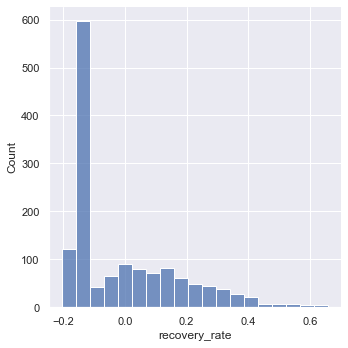

In [164]:
sns.displot(y_LGD_stage_2_test - y_hat_lgd_stage_2)

In [165]:
pickle.dump(reg_lgd_st_2, open('lgd_model_stage_2.save', 'wb'))

### Combine 2 stages

In [168]:
y_hat_lgd_stage_2_all = reg_lgd_st_2.predict(X_LGD_stage_1_test)

In [169]:
y_hat_lgd_stage_2_all

array([0.13970583, 0.16948183, 0.14531436, ..., 0.16167645, 0.14299414,
       0.13369777])

In [170]:
y_hat_lgd = y_hat_lgd_stage_1 * y_hat_lgd_stage_2_all

In [171]:
pd.DataFrame(y_hat_lgd).describe()

,0
count,1422.000000
mean,0.068380
std,0.074228
min,0.000000
25%,0.000000
50%,0.000000
75%,0.145779
max,0.216449


In [172]:
# if necessary

#y_hat_lgd = np.where(y_hat_lgd<0, 0, y_hat_lgd)
#y_hat_lgd = np.where(y_hat_lgd>1, 1, y_hat_lgd)

# EAD Model

In [173]:
X_EAD_train, X_EAD_test, y_EAD_train, y_EAD_test = train_test_split(credit_data_default_LGD_EAD.drop(['good_bad', 'recovery_rate', 'recovery_rate_0_1', 'CCF'], axis=1), credit_data_default_LGD_EAD['CCF'], test_size=0.2, random_state=42)

In [174]:
X_EAD_train = X_EAD_train[features_all]

In [175]:
X_EAD_train = X_EAD_train.drop(reference_cat, axis=1)

In [176]:
reg_ead = LinearRegression()

In [177]:
reg_ead.fit(X_EAD_train, y_EAD_train)

LinearRegression()

In [178]:
feature_name = X_EAD_train.columns.values

In [179]:
summary_table = pd.DataFrame(columns=['Feature Name'], data=feature_name)
summary_table['Coefficients'] = np.transpose(reg_ead.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg_ead.intercept_]
summary_table = summary_table.sort_index()
p_values = reg_ead.p
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature Name,Coefficients,p_values
0,Intercept,7.126174e-01,NaN
1,person_home_ownership:OWN,-1.543591e-02,0.248632
2,person_home_ownership:MORTGAGE,9.459410e-03,0.081110
3,person_home_ownership:OTHER,6.585921e-02,0.035359
4,cb_person_default_on_file:N,6.940443e-03,0.199071
5,loan_grade:A,-8.267620e-03,0.501158
6,loan_grade:B,-8.827728e-03,0.497869
7,loan_grade:C,-1.500226e-02,0.277076
8,loan_grade:D,-1.328529e-02,0.363299
9,loan_grade:E,6.197836e-03,0.712285


## EAD Model Validation

In [180]:
X_EAD_test = X_EAD_test[features_all]

In [181]:
X_EAD_test = X_EAD_test.drop(reference_cat, axis=1)

In [183]:
y_hat_ead = reg_ead.predict(X_EAD_test)

In [189]:
y_EAD_test_temp = y_EAD_test

In [190]:
y_EAD_test_temp = y_EAD_test_temp.reset_index(drop=True)

In [191]:
pd.concat([y_EAD_test_temp, pd.DataFrame(y_hat_ead)], axis=1).corr()

,CCF,0
CCF,1.000000,0.031161
0,0.031161,1.000000


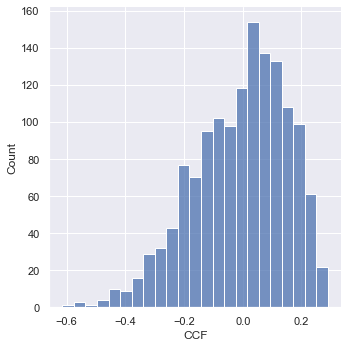

In [193]:
sns.displot(y_EAD_test - y_hat_ead)

In [194]:
pd.DataFrame(y_hat_ead).describe()

,0
count,1422.000000
mean,0.717700
std,0.011485
min,0.650247
25%,0.709760
50%,0.717574
75%,0.724346
max,0.803639


In [195]:
# if necessary

#y_hat_ead = np.where(y_hat_ead<0, 0, y_hat_ead)
#y_hat_ead = np.where(y_hat_ead>1, 1, y_hat_ead)

categories:
    
'person_home_ownership:OWN', 
'person_home_ownership:MORTGAGE', 
'person_home_ownership:RENT',
'person_home_ownership:OTHER',
'cb_person_default_on_file:Y', 
'cb_person_default_on_file:N',
'loan_grade:A',  
'loan_grade:B',
'loan_grade:C', 
'loan_grade:D', 
'loan_grade:E', 
'loan_grade:F', 
'loan_grade:G',
'loan_intent:DEBTCONSOLIDATION',
'loan_intent:EDUCATION', 
'loan_intent:HOMEIMPROVEMENT',
'loan_intent:MEDICAL',
'loan_intent:PERSONAL',
'loan_intent:VENTURE',
'person_age', 
'person_income', 
'person_emp_length', 
'loan_amnt', 
'loan_int_rate', 
'loan_percent_income:', 


reference categories:

'person_home_ownership:OTHER_RENT',
'cb_person_default_on_file:Y',
'loan_grade:G',
'loan_intent:DEBTCONSOLIDATION',


# Calculate Expected Loss

In [196]:
credit_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership:MORTGAGE,person_home_ownership:OTHER,person_home_ownership:OWN,person_home_ownership:RENT,loan_grade:A,loan_grade:B,loan_grade:C,loan_grade:D,loan_grade:E,loan_grade:F,loan_grade:G,cb_person_default_on_file:N,cb_person_default_on_file:Y,loan_intent:DEBTCONSOLIDATION,loan_intent:EDUCATION,loan_intent:HOMEIMPROVEMENT,loan_intent:MEDICAL,loan_intent:PERSONAL,loan_intent:VENTURE,good_bad
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0


In [200]:
credit_data_default_LGD_EAD.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership:MORTGAGE,person_home_ownership:OTHER,person_home_ownership:OWN,person_home_ownership:RENT,loan_grade:A,loan_grade:B,loan_grade:C,loan_grade:D,loan_grade:E,loan_grade:F,loan_grade:G,cb_person_default_on_file:N,cb_person_default_on_file:Y,loan_intent:DEBTCONSOLIDATION,loan_intent:EDUCATION,loan_intent:HOMEIMPROVEMENT,loan_intent:MEDICAL,loan_intent:PERSONAL,loan_intent:VENTURE,good_bad,recovery,recovery_rate,recovery_rate_0_1,total_rec_prcp,CCF
21472,33.0,19200.0,RENT,0.0,PERSONAL,B,6000.0,10.65,1.0,0.31,N,6.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3066.0,0.511000,1,1571.0,0.738167
18804,27.0,27000.0,OWN,0.0,EDUCATION,G,11500.0,20.11,1.0,0.43,N,9.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3386.0,0.294435,1,2940.0,0.744348
19105,27.0,15600.0,RENT,1.0,HOMEIMPROVEMENT,D,2250.0,18.25,1.0,0.14,N,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,460.0,0.204444,1,462.0,0.794667
20561,28.0,88000.0,RENT,3.0,PERSONAL,B,10000.0,10.65,1.0,0.11,N,9.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2582.0,0.258200,1,4000.0,0.600000
16782,25.0,49000.0,RENT,1.0,PERSONAL,D,12000.0,13.49,1.0,0.24,N,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1872.0,0.156000,1,2059.0,0.828417


In [198]:
credit_data.shape

(32576, 32)

In [199]:
credit_data_default_LGD_EAD.shape

(7108, 37)

In [201]:
credit_data_non_default = credit_data[credit_data['loan_status'] == 0]

In [202]:
credit_data_non_default.shape

(25468, 32)

In [204]:
credit_data_non_default.shape[0] + credit_data_default_LGD_EAD.shape[0] == credit_data.shape[0]

True

In [222]:
credit_data_non_default.loc[:, 'recovery'] = 0
credit_data_non_default.loc[:, 'recovery_rate'] = 0
credit_data_non_default.loc[:, 'recovery_rate_0_1'] = 0
credit_data_non_default.loc[:, 'total_rec_prcp'] = 0
credit_data_non_default.loc[:, 'CCF'] = 0

C:\Users\YizhiZhang\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [206]:
credit_data_non_default.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership:MORTGAGE,person_home_ownership:OTHER,person_home_ownership:OWN,person_home_ownership:RENT,loan_grade:A,loan_grade:B,loan_grade:C,loan_grade:D,loan_grade:E,loan_grade:F,loan_grade:G,cb_person_default_on_file:N,cb_person_default_on_file:Y,loan_intent:DEBTCONSOLIDATION,loan_intent:EDUCATION,loan_intent:HOMEIMPROVEMENT,loan_intent:MEDICAL,loan_intent:PERSONAL,loan_intent:VENTURE,good_bad,recovery,recovery_rate,recovery_rate_0_1,total_rec_prcp,CCF
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
14,23,115000,RENT,2.0,EDUCATION,A,35000,7.90,0,0.30,N,4,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
15,23,500000,MORTGAGE,7.0,DEBTCONSOLIDATION,B,30000,10.65,0,0.06,N,3,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0
16,23,120000,RENT,0.0,EDUCATION,A,35000,7.90,0,0.29,N,4,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
20,25,162500,RENT,2.0,VENTURE,A,35000,7.49,0,0.22,N,4,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0


In [207]:
credit_data_non_default.shape

(25468, 37)

In [208]:
credit_data_final = pd.concat([credit_data_non_default, credit_data_default_LGD_EAD])

In [209]:
credit_data_final.shape

(32576, 37)

In [210]:
credit_data_final = credit_data_final[features_all]

In [211]:
credit_data_final = credit_data_final.drop(reference_cat, axis=1)

## EAD

In [212]:
credit_data['recovery_rate_st_1'] = reg_lgd_st_1.model.predict(credit_data_final)

In [213]:
credit_data['recovery_rate_st_2'] = reg_lgd_st_2.predict(credit_data_final)

In [214]:
credit_data['recovery_rate'] = credit_data['recovery_rate_st_1'] * credit_data['recovery_rate_st_2']

In [215]:
credit_data['recovery_rate'] = np.where(credit_data['recovery_rate'] < 0, 0, credit_data['recovery_rate'])
credit_data['recovery_rate'] = np.where(credit_data['recovery_rate'] > 1, 1, credit_data['recovery_rate'])

In [216]:
credit_data['LDG'] = 1 - credit_data['recovery_rate'] 

In [217]:
credit_data['LDG'].describe() 

count    32576.000000
mean         0.891389
std          0.067935
min          0.598154
25%          0.845520
50%          0.856794
75%          1.000000
max          1.000000
Name: LDG, dtype: float64

## EAD

In [218]:
credit_data['CCF'] = reg_ead.predict(credit_data_final)

In [219]:
credit_data['CCF'] = np.where(credit_data['CCF'] < 0, 0, credit_data['CCF'])
credit_data['CCF'] = np.where(credit_data['CCF'] > 1, 1, credit_data['CCF'])

In [220]:
credit_data['EAD'] = credit_data['CCF'] * credit_data_final['loan_amnt']

In [221]:
credit_data['EAD'].describe()

count    32576.000000
mean      6885.779361
std       4538.699242
min        350.709224
25%       3573.960283
50%       5786.809575
75%       8839.057410
max      27506.921838
Name: EAD, dtype: float64

### PD

In [226]:
inputs_train = pd.read_csv('inputs_train.csv')
inputs_test = pd.read_csv('inputs_test.csv')

In [227]:
inputs_PD = pd.concat([inputs_test, inputs_train], axis=0)

In [228]:
inputs_PD.shape

(32576, 69)

In [229]:
inputs_PD.head()

,Unnamed: 0,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership:MORTGAGE,person_home_ownership:OTHER,person_home_ownership:OWN,person_home_ownership:RENT,loan_grade:A,loan_grade:B,loan_grade:C,loan_grade:D,loan_grade:E,loan_grade:F,loan_grade:G,cb_person_default_on_file:N,cb_person_default_on_file:Y,loan_intent:DEBTCONSOLIDATION,loan_intent:EDUCATION,loan_intent:HOMEIMPROVEMENT,loan_intent:MEDICAL,loan_intent:PERSONAL,loan_intent:VENTURE,person_home_ownership:OTHER_RENT,person_age:<=22,person_age:23-28,person_age:29-33,person_age:34-37,person_age:>=38,person_income_factor,person_income:<=20K,person_income:20K-34K,person_income:34K-52.5K,person_income:52.5K-66.5K,person_income:66.5K-75.7K,person_income:>75.7K,person_emp_length:<=2,person_emp_length:3-7,person_emp_length:8-10,person_emp_length:>10,loan_amnt_factor,loan_amnt:<=3260,loan_amnt:3260-8090,loan_amnt:8090-12230,loan_amnt:12230-18440,loan_amnt:>18440,loan_int_rate_factor,loan_int_rate:<=6.488,loan_int_rate:6.488-9.692,loan_int_rate:9.692-10.76,loan_int_rate:10.76-13.964,loan_int_rate:13.964-15.388,loan_int_rate:15.388-17.88,loan_int_rate:>17.88,loan_percent_income_factor,loan_percent_income:<=13.3pct,loan_percent_income:13.3-16.6pct,loan_percent_income:16.6-29.9pct,loan_percent_income:29.9-31.5pct,loan_percent_income:>31.5pct
0,14451,25,107000,MORTGAGE,1.0,MEDICAL,A,1000,7.400000,0,0.01,N,4,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,"(81760.0, 119640.0]",1,1,1,1,1,1,1,0,0,0,"(465.5, 1190.0]",1,0,0,0,0,"(7.378, 7.705]",0,1,0,0,0,0,0,"(-0.00067, 0.0134]",1,0,0,0,0
1,29639,40,34560,MORTGAGE,3.0,MEDICAL,B,10000,11.011695,0,0.29,N,12,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,"(4106.0, 43880.0]",1,1,1,0,0,0,0,1,0,0,"(9470.0, 10160.0]",0,0,1,0,0,"(10.969, 11.295]",0,0,0,1,0,0,0,"(0.281, 0.295]",0,0,1,0,0
2,11100,22,42000,RENT,6.0,MEDICAL,E,10000,16.320000,1,0.24,Y,4,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,"(4106.0, 43880.0]",1,1,1,0,0,0,0,1,0,0,"(9470.0, 10160.0]",0,0,1,0,0,"(16.191, 16.518]",0,0,0,0,0,1,0,"(0.228, 0.241]",0,0,1,0,0
3,10428,21,28600,RENT,3.0,PERSONAL,C,10000,11.340000,1,0.35,Y,3,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,"(4106.0, 43880.0]",1,1,0,0,0,0,0,1,0,0,"(9470.0, 10160.0]",0,0,1,0,0,"(11.295, 11.622]",0,0,0,1,0,0,0,"(0.348, 0.362]",0,0,0,0,1
4,12632,22,28000,RENT,4.0,EDUCATION,B,3000,10.590000,0,0.11,N,3,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,"(4106.0, 43880.0]",1,1,0,0,0,0,0,1,0,0,"(2570.0, 3260.0]",1,0,0,0,0,"(10.316, 10.642]",0,0,1,0,0,0,0,"(0.107, 0.121]",1,0,0,0,0


In [230]:
inputs_PD = inputs_PD.set_index('Unnamed: 0')

In [231]:
inputs_PD.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership:MORTGAGE,person_home_ownership:OTHER,person_home_ownership:OWN,person_home_ownership:RENT,loan_grade:A,loan_grade:B,loan_grade:C,loan_grade:D,loan_grade:E,loan_grade:F,loan_grade:G,cb_person_default_on_file:N,cb_person_default_on_file:Y,loan_intent:DEBTCONSOLIDATION,loan_intent:EDUCATION,loan_intent:HOMEIMPROVEMENT,loan_intent:MEDICAL,loan_intent:PERSONAL,loan_intent:VENTURE,person_home_ownership:OTHER_RENT,person_age:<=22,person_age:23-28,person_age:29-33,person_age:34-37,person_age:>=38,person_income_factor,person_income:<=20K,person_income:20K-34K,person_income:34K-52.5K,person_income:52.5K-66.5K,person_income:66.5K-75.7K,person_income:>75.7K,person_emp_length:<=2,person_emp_length:3-7,person_emp_length:8-10,person_emp_length:>10,loan_amnt_factor,loan_amnt:<=3260,loan_amnt:3260-8090,loan_amnt:8090-12230,loan_amnt:12230-18440,loan_amnt:>18440,loan_int_rate_factor,loan_int_rate:<=6.488,loan_int_rate:6.488-9.692,loan_int_rate:9.692-10.76,loan_int_rate:10.76-13.964,loan_int_rate:13.964-15.388,loan_int_rate:15.388-17.88,loan_int_rate:>17.88,loan_percent_income_factor,loan_percent_income:<=13.3pct,loan_percent_income:13.3-16.6pct,loan_percent_income:16.6-29.9pct,loan_percent_income:29.9-31.5pct,loan_percent_income:>31.5pct
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
14451,25,107000,MORTGAGE,1.0,MEDICAL,A,1000,7.400000,0,0.01,N,4,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,"(81760.0, 119640.0]",1,1,1,1,1,1,1,0,0,0,"(465.5, 1190.0]",1,0,0,0,0,"(7.378, 7.705]",0,1,0,0,0,0,0,"(-0.00067, 0.0134]",1,0,0,0,0
29639,40,34560,MORTGAGE,3.0,MEDICAL,B,10000,11.011695,0,0.29,N,12,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,"(4106.0, 43880.0]",1,1,1,0,0,0,0,1,0,0,"(9470.0, 10160.0]",0,0,1,0,0,"(10.969, 11.295]",0,0,0,1,0,0,0,"(0.281, 0.295]",0,0,1,0,0
11100,22,42000,RENT,6.0,MEDICAL,E,10000,16.320000,1,0.24,Y,4,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,"(4106.0, 43880.0]",1,1,1,0,0,0,0,1,0,0,"(9470.0, 10160.0]",0,0,1,0,0,"(16.191, 16.518]",0,0,0,0,0,1,0,"(0.228, 0.241]",0,0,1,0,0
10428,21,28600,RENT,3.0,PERSONAL,C,10000,11.340000,1,0.35,Y,3,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,"(4106.0, 43880.0]",1,1,0,0,0,0,0,1,0,0,"(9470.0, 10160.0]",0,0,1,0,0,"(11.295, 11.622]",0,0,0,1,0,0,0,"(0.348, 0.362]",0,0,0,0,1
12632,22,28000,RENT,4.0,EDUCATION,B,3000,10.590000,0,0.11,N,3,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,"(4106.0, 43880.0]",1,1,0,0,0,0,0,1,0,0,"(2570.0, 3260.0]",1,0,0,0,0,"(10.316, 10.642]",0,0,1,0,0,0,0,"(0.107, 0.121]",1,0,0,0,0


In [232]:
features_all_PD = [ 'person_home_ownership:OWN', 
    'person_home_ownership:MORTGAGE', 
    'person_home_ownership:OTHER_RENT',
    'cb_person_default_on_file:Y', 
    'cb_person_default_on_file:N',
    'loan_grade:A',  
    'loan_grade:B',
    'loan_grade:C', 
    'loan_grade:D', 
    'loan_grade:E', 
    'loan_grade:F', 
    'loan_grade:G',
    'loan_intent:DEBTCONSOLIDATION',
    'loan_intent:EDUCATION', 
    'loan_intent:HOMEIMPROVEMENT',
    'loan_intent:MEDICAL',
    'loan_intent:PERSONAL',
    'loan_intent:VENTURE',
    'person_age:<=22', 
    'person_age:23-28', 
    'person_age:29-33', 
    'person_age:34-37',  
    'person_age:>=38',
    'person_income:<=20K', 
    'person_income:20K-34K',  
    'person_income:34K-52.5K', 
    'person_income:52.5K-66.5K', 
    'person_income:66.5K-75.7K',  
    'person_income:>75.7K',
    'person_emp_length:<=2', 
    'person_emp_length:3-7', 
    'person_emp_length:8-10', 
    'person_emp_length:>10',
    'loan_amnt:<=3260', 
    'loan_amnt:3260-8090', 
    'loan_amnt:8090-12230', 
    'loan_amnt:12230-18440',  
    'loan_amnt:>18440',
    'loan_int_rate:<=6.488', 
    'loan_int_rate:6.488-9.692', 
    'loan_int_rate:9.692-10.76', 
    'loan_int_rate:10.76-13.964', 
    'loan_int_rate:13.964-15.388', 
    'loan_int_rate:15.388-17.88', 
    'loan_int_rate:>17.88',
    'loan_percent_income:<=13.3pct', 
    'loan_percent_income:13.3-16.6pct', 
    'loan_percent_income:16.6-29.9pct', 
    'loan_percent_income:29.9-31.5pct', 
    'loan_percent_income:>31.5pct']

In [233]:
ref_categories_PD = [
    'person_home_ownership:OTHER_RENT',
    'cb_person_default_on_file:Y',
    'loan_grade:G',
    'loan_intent:DEBTCONSOLIDATION',
    'person_age:<=22',
    'person_income:<=20K',
    'person_emp_length:<=2',
    'loan_amnt:>18440',
    'loan_int_rate:>17.88',
    'loan_percent_income:>31.5pct'
]

In [235]:
inputs_PD_temp = inputs_PD[features_all_PD]

In [236]:
inputs_PD_temp = inputs_PD_temp.drop(ref_categories_PD, axis=1)

In [237]:
inputs_PD_temp.shape

(32576, 40)